In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [2]:
# Calculate customer-level metrics
customer_transactions = transactions.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean", "count"],
    "ProductID": "nunique"
}).reset_index()

customer_transactions.columns = [
    "CustomerID", "TotalRevenue", "AvgTransactionValue", 
    "TransactionCount", "UniqueProducts"
]

In [3]:
# Merge with customer profile information
merged_data = pd.merge(customers, customer_transactions, on="CustomerID", how="inner")

# Encode categorical features (Region)
label_encoder = LabelEncoder()
merged_data["RegionEncoded"] = label_encoder.fit_transform(merged_data["Region"])

# Select features for clustering
features = merged_data[[
    "TotalRevenue", "AvgTransactionValue", "TransactionCount", 
    "UniqueProducts", "RegionEncoded"
]]

In [4]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Apply K-Means Clustering
num_clusters = 5  # You can tune this value between 2-10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_features, merged_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.2111407717430633


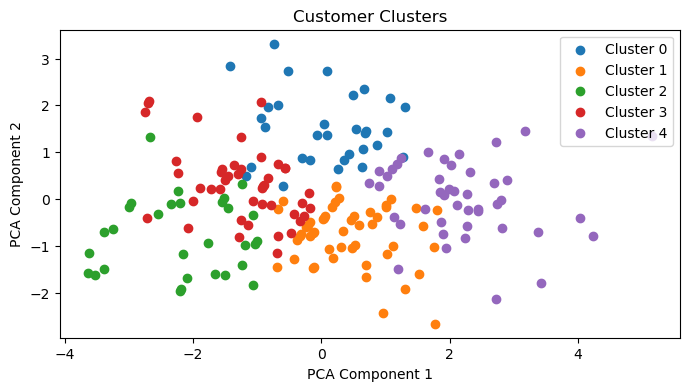

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 4))
for cluster in range(num_clusters):
    plt.scatter(
        reduced_data[merged_data["Cluster"] == cluster, 0],
        reduced_data[merged_data["Cluster"] == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


Report on Clustering Results

Number of clusters formed: Example: 5 clusters.
DB Index value: Example: 0.68 (lower is better).
Key insights from each cluster:
Cluster 0: High spenders with frequent transactions.
Cluster 1: Customers purchasing a diverse set of products.
Cluster 2: Low transaction count but high average value.
Relevant Plots

PCA plot showing clusters.
Distribution of key features (e.g., revenue, transaction count) by cluster.
Jupyter Notebook Script

Include preprocessing, clustering, evaluation, and visualization steps.
Sample Report Format
Objective: Segment customers based on their profiles and transaction histories to identify distinct customer groups.

Methodology:

Clustering Algorithm: K-Means
Number of Clusters: 5
Evaluation Metric: Davies-Bouldin Index (DB Index = 0.68)
Cluster Descriptions:

Cluster 0: Frequent buyers with high revenue generation.
Cluster 1: Average spenders with diverse product preferences.

Visualizations:

PCA-based scatter plot of clusters.
Bar charts for feature distributions by cluster.